In [102]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline 
from __future__ import division
from sympy import Symbol, init_printing
from sympy.solvers import solve
from IPython.display import display
init_printing() 

In [161]:
#Pick a random value of z and generate training points (x, y) such that x & y are conditionally independent given z
pz = np.random.random()
x_z0 = np.random.random()
x_z1 = np.random.random()
y_z0 = np.random.random()
y_z1 = np.random.random()

px = pz*x_z0+(1-pz)*x_z1
py = pz*y_z0+(1-pz)*y_z1

n        = 1 #Bernoulli random variable
nsamples = 10000
x_train  = np.random.binomial(n, 1-px, size=(nsamples,))
y_train  = np.random.binomial(n, 1-py, size=(nsamples,))

#generate test data such that p(y|z) is the same but p(x|z) is different
new_x_z0 = np.random.random()
new_x_z1 = np.random.random()

new_px = pz*new_x_z0+(1-pz)*new_x_z1
x_test  = np.random.binomial(n, 1-new_px, size=(nsamples,))
y_test  = np.random.binomial(n, 1-py, size=(nsamples,))


#estimates for p(x),p(y),p(x,y) from training data
cal_x = sum(x_train ==0)/nsamples
cal_y = sum(y_train ==0)/nsamples

cal_xy =  sum([u==0 and v==0 for u,v in zip(x_train,y_train)])/nsamples

#estimates for p(x) from  test data
test_x = sum(x_test ==0)/nsamples
test_xy =  sum([u==0 and v==0 for u,v in zip(x_test,y_test)])/nsamples


In [169]:
#Solving for the conditional probabilities b = p(x =0|z=1), c = p(y=0|z=0),d =p(y=0|z=1)
x = Symbol('x')
y  = Symbol('y')

p_xy = Symbol('p_xy')

a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
d = Symbol('d')

z_0 = Symbol('z_0')

sols = solve([
    z_0 * a + (1 - z_0) * b - x,
    z_0 * c + (1 - z_0) * d - y,

    z_0 * a * c + (1 - z_0) * b * d - p_xy
], b, c, d, dict=True)

def compute_sols(cal_x, cal_y, cal_xy, cal_z, cal_a):
    def evaluate(s):
        return s.evalf(subs={x: cal_x, y: cal_y, p_xy: cal_xy, z_0: cal_z, a: cal_a})
    
    return dict((k, evaluate(s)) for k, s in sols[0].items())

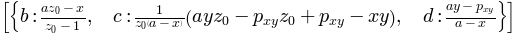

In [163]:
sols

In [164]:
x = Symbol('x')
y  = Symbol('y')

p_xy = Symbol('p_xy')

a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
d = Symbol('d')

z_0 = Symbol('z_0')
test_sols = solve([
    z_0 * a + (1 - z_0) * b - x,
    z_0 * a * c + (1 - z_0) * b * d - p_xy
], a, b, dict=True)

def compute_sols_test(cal_x, cal_xy, cal_z, cal_c, cal_d):
    def evaluate(s):
        return s.evalf(subs={x: cal_x, p_xy: cal_xy, z_0: cal_z, c: cal_c, d: cal_d})
    
    return dict((k, evaluate(s)) for k, s in test_sols[0].items())

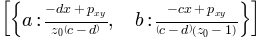

In [165]:
test_sols

In [170]:
print "z: ", pz
print "p(y|x): ",  cal_xy/cal_x
print "test p(y|x): ",  test_xy/test_x
for temp_z in np.arange(0.1,1,0.1):
    x_00 = np.random.random()
    sol = compute_sols(cal_x, cal_y, cal_xy, temp_z, x_00)
    x_01, y_00, y_01 = sol[b],sol[c],sol[d]

    sol_test= compute_sols_test(test_x, np.random.random(), temp_z, y_00, y_01)
    #test_x00, test_x01 = sol_test[a],sol_test[b]
    
    print "temp_z: ", temp_z, " y|x: ", ((temp_z*y_00*x_00 + (1-temp_z)*y_01*x_01)/cal_x)#,\
     #"  test y|x: ", ((temp_z*y_00*test_x00 + (1-temp_z)*y_01*test_x01)/test_x)

z:  0.558448919603
p(y|x):  0.118890356671
test p(y|x):  0.123803446075
temp_z:  0.1  y|x:  0.118890356671070
temp_z:  0.2  y|x:  0.118890356671070
temp_z:  0.3  y|x:  0.118890356671070
temp_z:  0.4  y|x:  0.118890356671070
temp_z:  0.5  y|x:  0.118890356671070
temp_z:  0.6  y|x:  0.118890356671070
temp_z:  0.7  y|x:  0.118890356671070
temp_z:  0.8  y|x:  0.118890356671070
temp_z:  0.9  y|x:  0.118890356671070


In [117]:
 print (temp_z*y_00*x_00 + (1-temp_z)*y_01*x_01)/cal_x, cal_xy/cal_x

0.235939643347051 0.235939643347


In [114]:
(temp_z*y_00*x_00 + (1-temp_z)*y_01*x_01)